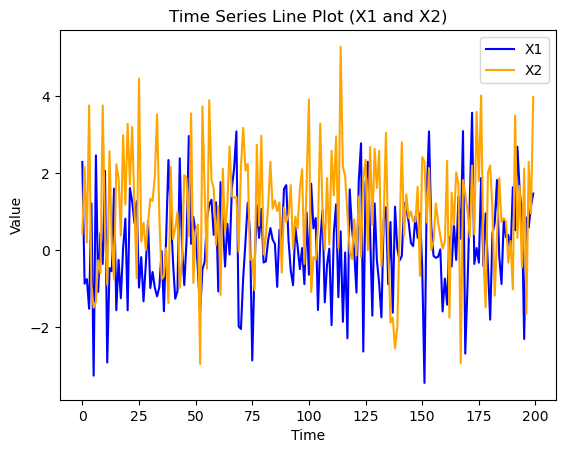

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


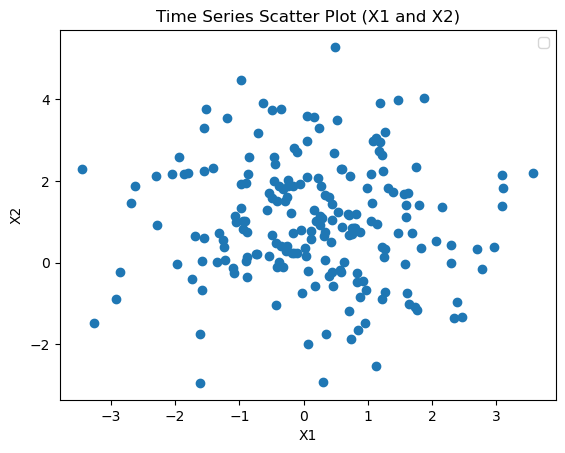

In [9]:
# 3.4.2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(1)

# Parameters for the distributions
mean_X1 = 0
variance_X1 = 2
mean_X2 = 1
variance_X2 = 2
n_points = 200

# Generate the data points
X1 = np.random.normal(loc=mean_X1, scale=np.sqrt(variance_X1), size=n_points)
X2 = np.random.normal(loc=mean_X2, scale=np.sqrt(variance_X2), size=n_points)

# Plot the time series
plt.figure()
plt.savefig('plots/Cluster_TimeSeries.png')
plt.plot(X1, label='X1', color='blue')
plt.plot(X2, label='X2', color='orange')
plt.title('Time Series Line Plot (X1 and X2)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Scatter plot
plt.figure()
plt.savefig('plots/Cluster_Scatter.png')
plt.scatter(X1, X2)
plt.title('Time Series Scatter Plot (X1 and X2)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\clu

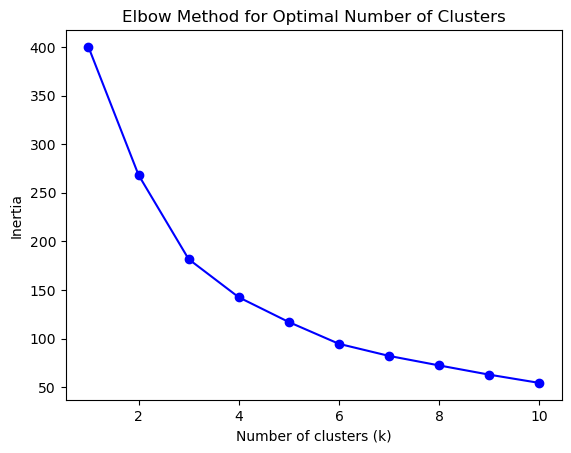

In [48]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Merge both series
combined_series=np.column_stack((X1,X2))

# Standardize the data. Modify so mean of series is 0 and variance is 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_series)

# Determine the optimal number of clusters using the Elbow method
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure()
plt.savefig('plots/Cluster_kmeans_elbow.png')
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\anaconda3\envs\Embedded_Intelligence\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


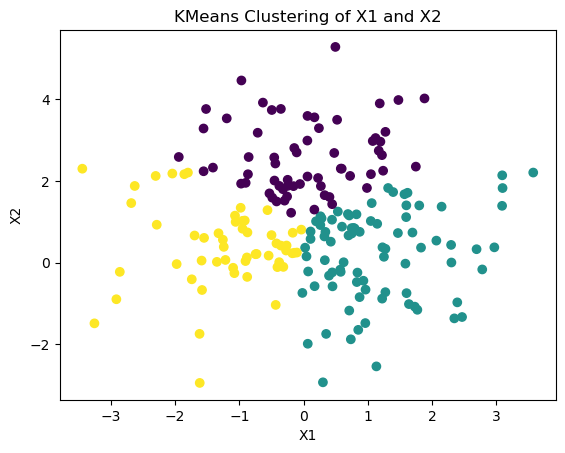

In [55]:
# From the Elbow plot, OPtimal K is found
optimal_k = 3

# Apply KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k)
clusters = kmeans.fit_predict(scaled_data)

# Plot the clustered data
plt.figure()
plt.savefig('plots/Cluster_kmeans.png')
plt.scatter(X1, X2, c=clusters, cmap = 'viridis')
plt.title('KMeans Clustering of X1 and X2')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


Anomalies: 
 [[-1.3726856  -2.69299129]
 [-2.79274523  0.8938159 ]
 [ 0.11740625 -2.68279962]
 [ 2.66100498  0.82934914]]


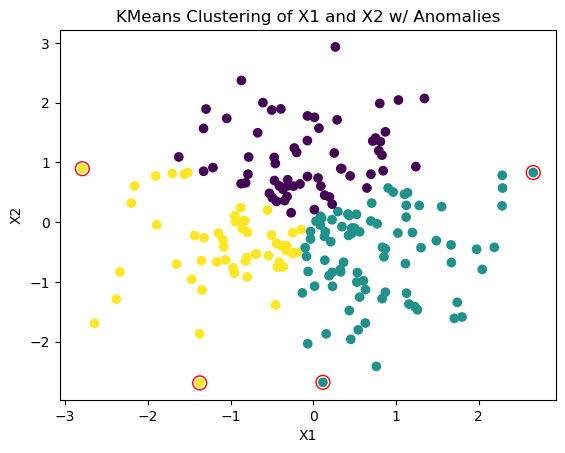

In [67]:

# Calculate the euclidean distance of each point to its nearest centroid
centroids = kmeans.cluster_centers_
data_to_centroid_distances = np.linalg.norm(scaled_data - centroids[clusters], axis=1)

# Set outlier ratio
outlier_ratio = 2 # %
# Determine data point outliers
threshold = np.percentile(data_to_centroid_distances, 100 - outlier_ratio)
# Separate anomalies and normal data points
anomalies = scaled_data[data_to_centroid_distances > threshold]
normal = scaled_data[data_to_centroid_distances <= threshold]

print("Anomalies: \n", anomalies)

# Scatter plot
plt.figure()
plt.savefig('plots/Cluster_kmeans_w_anomalies.png')
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters, cmap = 'viridis')
plt.scatter(anomalies[:,0], anomalies[:,1], edgecolor='red', facecolors='none', s=100, label='Outliers')
plt.title('KMeans Clustering of X1 and X2 w/ Anomalies')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# SOM